In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [2]:
plt.style.use("ggplot")

In [5]:
BASE_FOLDER = "drive_stare"

In [41]:
files = sorted(glob.glob(BASE_FOLDER + "/*.csv"))

for i, f in enumerate(files):
    print(i, ":", os.path.basename(f))

0 : run-Mar27_23-28-19_diracDRIVE-unet-BatchNorm-combinedLoss-antialias-biginput-tag-Train_Dice_score.csv
1 : run-Mar27_23-28-19_diracDRIVE-unet-BatchNorm-combinedLoss-antialias-biginput-tag-Validation_AUC.csv
2 : run-Mar27_23-28-19_diracDRIVE-unet-BatchNorm-combinedLoss-antialias-biginput-tag-Validation_Dice_score.csv
3 : run-Mar27_23-28-19_diracDRIVE-unet-BatchNorm-combinedLoss-antialias-biginput-tag-Validation_Loss.csv
4 : run-Mar28_22-08-42_diracDRIVE+STARE-unet-BatchNorm-combinedLoss-antialias-tag-Train_Dice_score.csv
5 : run-Mar28_22-08-42_diracDRIVE+STARE-unet-BatchNorm-combinedLoss-antialias-tag-Validation_AUC.csv
6 : run-Mar28_22-08-42_diracDRIVE+STARE-unet-BatchNorm-combinedLoss-antialias-tag-Validation_Dice_score.csv
7 : run-Mar28_22-08-42_diracDRIVE+STARE-unet-BatchNorm-combinedLoss-antialias-tag-Validation_Loss.csv
8 : run-Mar29_00-43-50_diracDRIVE+STARE-attunet-BatchNorm-combinedLoss-antialias-tag-Train_Dice_score.csv
9 : run-Mar29_00-43-50_diracDRIVE+STARE-attunet-BatchN

In [42]:
dfs = {f: pd.read_csv(f) for f in files}

In [43]:
metric_keys = ['Train_Dice', 'Validation_Dice', 'Validation_AUC']
labels = {
#    'antialias-t': '20/80 whole image/crops',
#    'morewhole': '50/50 whole image/crops'
#    'combinedLoss': 'Combined CE + Dice loss',
#    'diceLoss': '(Soft) Dice loss',
#    'crossentropyLoss': 'Cross-entropy loss'
    'DRIVE-u': 'DRIVE (U-Net)',
    'STARE-u': 'STARE (U-Net)',
    'DRIVE+STARE-u': 'DRIVE and STARE (U-Net)',
    'DRIVE+STARE-a': 'DRIVE+STARE (Attn U-Net)'
#    'noantialias-g': 'no antialising 320x320',
#    'biginput-N': 'no antialiasing 400x400'

}
methods_ = list(labels.keys())

In [44]:
big_dico = {}
for metr in metric_keys:
    big_dico[metr] = {
        meth: dfs[f]
        for meth in methods_
        for f in files
        if meth in f and metr in f
    }

In [45]:
print(big_dico.keys())
print(big_dico[list(big_dico.keys())[0]].keys())

dict_keys(['Train_Dice', 'Validation_Dice', 'Validation_AUC'])
dict_keys(['DRIVE-u', 'STARE-u', 'DRIVE+STARE-u', 'DRIVE+STARE-a'])


In [46]:
def expo_mov_avg(series, alpha=.6):
    return series.ewm(alpha=alpha).mean()

def plot_with_mov_avg(series, ax, label):
    """Plot the Value column with exponential moving average"""
    l, = ax.plot(series, alpha=.1)
    series = expo_mov_avg(series)
    ax.plot(series, label=label, c=l.get_color())

3 subplots


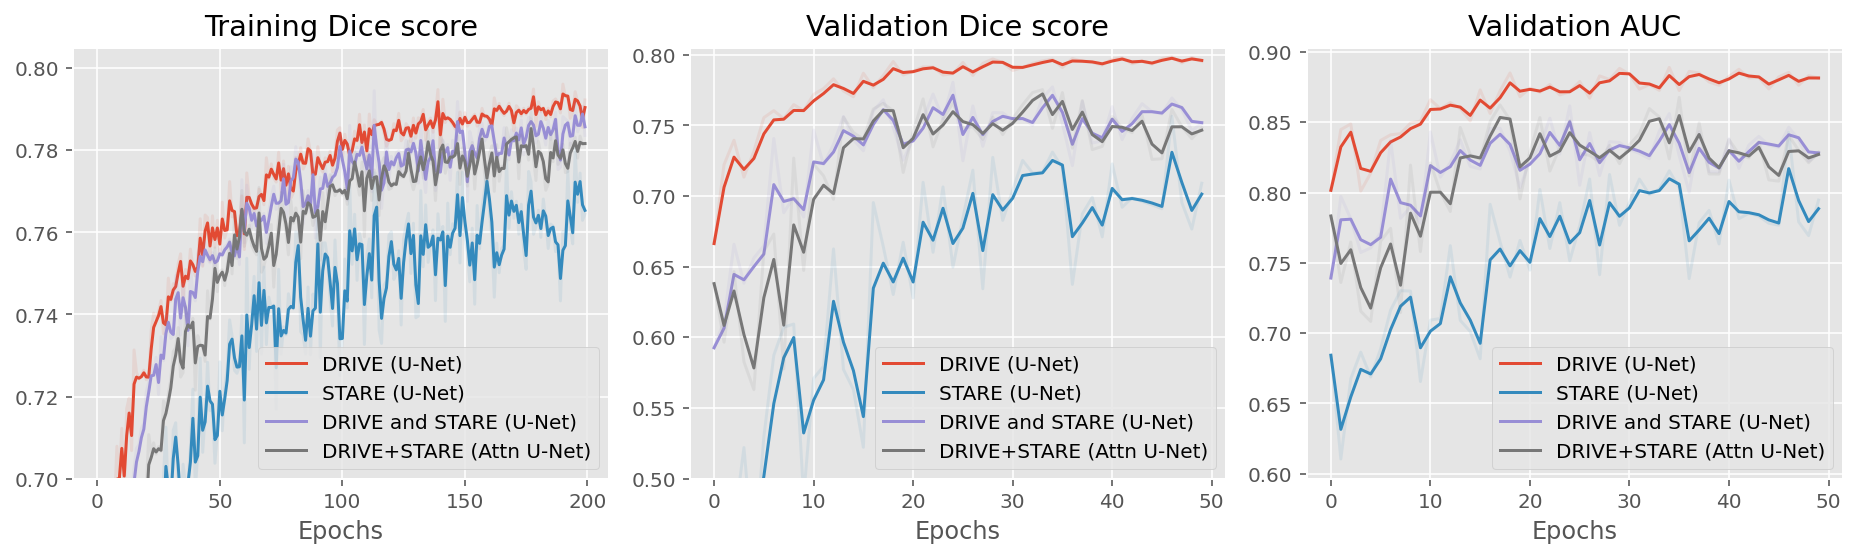

In [47]:
num_subplots = len(big_dico.keys())
print("%d subplots" % num_subplots)
fig = plt.figure(figsize=(13, 4))
ax = fig.add_subplot(1, num_subplots, 1)

for key, meth in labels.items():
    #plt.plot(big_dico['Train_Dice'][key].Value, label=meth)
    plot_with_mov_avg(big_dico['Train_Dice'][key].Value, ax, meth)
#plt.plot(big_dico['Train_Dice']['combinedLoss'].Value, label="Combined Loss")
#plt.plot(big_dico['Train_Dice']['diceLoss'].Value, label="(Soft) Dice Loss")
plt.title("Training Dice score")
plt.ylim((0.7, 0.805))
plt.xlabel("Epochs")
plt.legend()

ax = fig.add_subplot(1, num_subplots, 2)

#plt.plot(dfs[2].Value, label="Combined Loss")
#plt.plot(dfs[5].Value, label="(Soft) Dice Loss")
for key, meth in labels.items():
    plot_with_mov_avg(big_dico['Validation_Dice'][key].Value, ax, meth)
#plot_with_mov_avg(big_dico['Validation_Dice']['diceLoss'].Value, ax, "(Soft) Dice Loss")
plt.title("Validation Dice score")
plt.ylim((0.5, 0.805))
plt.xlabel("Epochs")
plt.legend()

ax = fig.add_subplot(1, num_subplots, 3)
#l, = plt.plot(dfs[1].Value, alpha=.1)
#plt.plot(expo_mov_avg(dfs[1]), label="Combined Loss", c=l.get_color())
for key, meth in labels.items():
    plot_with_mov_avg(big_dico['Validation_AUC'][key].Value, ax, meth)
#plot_with_mov_avg(big_dico['Validation_AUC']['combinedLoss'].Value, ax, "Combined Loss")
#plot_with_mov_avg(big_dico['Validation_AUC']['diceLoss'].Value, ax, "(Soft) Dice Loss")

plt.title("Validation AUC")
# plt.ylim((0.8, 0.9))
plt.xlabel("Epochs")
plt.legend()
plt.tight_layout()

plt.tight_layout()

In [49]:
fig.savefig(BASE_FOLDER+'/{:s}.png'.format("dataset_train_comparison"))